In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
import os 
import warnings
import numpy as np
import pdb
import argparse
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jhsia2/ragged')
from file_utils import save_json, save_jsonl, load_jsonl, load_json

In [2]:
import os
result_dir = "/data/tir/projects/tir6/general/afreens/dbqa"


loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt_results_by_k.json
bm25_doc_match = [0.018329221008107157, 0.028903771589707437, 0.045118082481494536, 0.05498766302432147, 0.06556221360592175, 0.07472682410997533, 0.0824814945364822, 0.08953119492421573, 0.09834332040888262, 0.10433556573845612, 0.11209023616496298, 0.11737751145576313, 0.12019739161085653, 0.1254846669016567, 0.13147691223123018, 0.1339443073669369, 0.13746915756080366, 0.1427564328516038, 0.1473387381036306, 0.150158618258724, 0.1543884384913641, 0.1572083186464575, 0.1607331688403243, 0.16425801903419104, 0.16672541416989778, 0.16989777934437786, 0.17307014451885794, 0.1769474797321114, 0.17906238984843145, 0.1811772999647515, 0.18505463517800494, 0.18787451533309835, 0.1899894254494184, 0.19210433556573844, 0.1942192456820585, 0.19633415579837857, 0.19915403595347198, 0.2016214310891787, 0.20408882622488544, 0.20585125132181883, 0.21078604159323228, 0.21254846

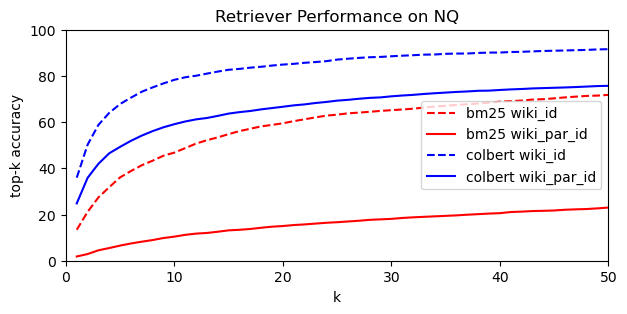

saving figure in /data/tir/projects/tir6/general/afreens/dbqa/figs/nq_retriever_results_by_k.pdf


In [37]:
# wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
dataset = 'nq-dev-kilt'
is_bioasq = True if 'bioasq' in dataset else False
ks = np.arange(1,101)
plt.figure(figsize = (7,3))
retrievers = ['bm25', 'colbert']
colors = 'rb'
if is_bioasq:
    docid_key = 'pmid'
    docid_name = 'pm'
    section_key = 'section'
    section_name = 'sec'
else:
    docid_key = 'wikipedia_id'
    docid_name = 'wiki'
    section_name = 'par'
    section_key = 'start_paragraph_id'
# ks = results_by_k.keys()
    
    
results_by_key = {}
for i, retriever in enumerate(retrievers):
    evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
    results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
    wiki_id_match = []
    wiki_par_id_match = []

    # for key, value in results_by_k.items():
    #     if key in results_by_key:
    #         results_by_key[key].append(value)
    #     else:
    #         results_by_key[key] = value

    for k in ks:
        wiki_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_id accuracy'])
        wiki_par_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_{section_name}_id accuracy'])
    if retriever == 'colbert':
        colbert_wiki_par_id_match = wiki_par_id_match
    else:
        bm25_wiki_par_id_match = wiki_par_id_match

    color = colors[i]
    # print(wiki_id_match)
    print(f'{retriever}_doc_match = {wiki_par_id_match[:50]}')
    plt.plot(ks, 100*np.array(wiki_id_match), color = color, linestyle = '--', label = f'{retriever} wiki_id')
    plt.plot(ks, 100*np.array(wiki_par_id_match), color = color, label = f'{retriever} wiki_par_id')
    # break
   

# plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
plt.title(f'Retriever Performance on NQ')
plt.ylabel('top-k accuracy')
plt.ylim(bottom = 0, top = 100)
# plt.yticks(ticks = np.arange(0, 1.1, 0.2))
plt.xlabel('k')
plt.legend()
plt.xlim(left =0, right = 50)
fig_file = os.path.join('/data/tir/projects/tir6/general/afreens/dbqa/figs/', dataset.split('-')[0]+ '_retriever_results_by_k.pdf')
plt.savefig(fig_file, bbox_inches='tight', pad_inches=0)
plt.show()
print('saving figure in', fig_file)

In [33]:
# loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt_results_by_k.json
bm25_doc_match = [0.018329221008107157, 0.028903771589707437, 0.045118082481494536, 0.05498766302432147, 0.06556221360592175, 0.07472682410997533, 0.0824814945364822, 0.08953119492421573, 0.09834332040888262, 0.10433556573845612, 0.11209023616496298, 0.11737751145576313, 0.12019739161085653, 0.1254846669016567, 0.13147691223123018, 0.1339443073669369, 0.13746915756080366, 0.1427564328516038, 0.1473387381036306, 0.150158618258724, 0.1543884384913641, 0.1572083186464575, 0.1607331688403243, 0.16425801903419104, 0.16672541416989778, 0.16989777934437786, 0.17307014451885794, 0.1769474797321114, 0.17906238984843145, 0.1811772999647515, 0.18505463517800494, 0.18787451533309835, 0.1899894254494184, 0.19210433556573844, 0.1942192456820585, 0.19633415579837857, 0.19915403595347198, 0.2016214310891787, 0.20408882622488544, 0.20585125132181883, 0.21078604159323228, 0.21254846669016567, 0.2150158618258724, 0.21607331688403242, 0.21748325696157914, 0.22065562213605922, 0.2224180472329926, 0.2238279873105393, 0.2266478674656327, 0.23017271765949948]
# loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt_results_by_k.json
colbert_doc_match = [0.24814945364821994, 0.35882974973563625, 0.4198096580895312, 0.46528022559041243, 0.49312654212195983, 0.5192104335565738, 0.5417694747973211, 0.5611561508635883, 0.5777229467747621, 0.5911173775114558, 0.6027493831512161, 0.6119139936552697, 0.6179062389848431, 0.6270708494888967, 0.6369404300317236, 0.6432851603806838, 0.6482199506520973, 0.6552696510398308, 0.6609094113500176, 0.6665491716602044, 0.672541416989778, 0.676771237222418, 0.6827634825519915, 0.6873457878040183, 0.6929855481142051, 0.6965103983080719, 0.7010927035600987, 0.7049700387733522, 0.7070849488896722, 0.711667254141699, 0.7151921043355658, 0.7180119844906592, 0.7218893197039126, 0.7250616848783926, 0.7278815650334861, 0.7307014451885795, 0.7328163553048995, 0.7356362354599929, 0.7363412054987662, 0.7391610856538597, 0.7416284807895664, 0.7433909058864998, 0.7458583010222065, 0.7472682410997532, 0.7486781811773, 0.7500881212548467, 0.7518505463517801, 0.7539654564681001, 0.7560803665844201, 0.7571378216425801]
np.mean(np.array(colbert_wiki_par_id_match[:50])-np.array(bm25_wiki_par_id_match[:50]))*100

50.086711314769126

In [3]:
# # wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
# dataset = 'nq-dev-kilt'
# is_bioasq = True if 'bioasq' in dataset else False
# ks = np.arange(1,101)
# retrievers = ['bm25', 'colbert']
# colors = 'rb'
# if is_bioasq:
#     docid_key = 'pmid'
#     docid_name = 'pm'
#     section_key = 'section'
#     section_name = 'sec'
# else:
#     docid_key = 'wikipedia_id'
#     docid_name = 'wiki'
#     section_name = 'par'
#     section_key = 'start_paragraph_id'
# # ks = results_by_k.keys()

    
# for i, retriever in enumerate(retrievers):
#     evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
#     results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
#     wiki_id_match = []
#     wiki_par_id_match = []

#     for k in ks:
#         wiki_id_match.append(results_by_k[(str)(k)][f"precision@k {docid_name}_id"])
#         wiki_par_id_match.append(results_by_k[(str)(k)][f"precision@k {docid_name}_{section_name}_id"])


#     color = colors[i]
#     if retriever == 'colbert':
#         colbert_wiki_par_id_match = wiki_par_id_match
#     else:
#         bm25_wiki_par_id_match = wiki_par_id_match
#     plt.plot(ks, wiki_id_match, color = color, linestyle = '--', label = f'{retriever} {docid_name}')
#     plt.plot(ks, wiki_par_id_match, color = color, label = f'{retriever} {docid_name}_{section_name}')
#     # break

# # plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
# plt.title(f'Retriever Performance on NQ')
# plt.ylim(bottom = 0, top = 1.0)
# plt.yticks(ticks = np.arange(0, 1.1, 0.2))
# plt.ylabel('precision @k')
# plt.xlabel('k')
# plt.legend()
# plt.xlim(left =0, right = 50)
# # plt.savefig(os.path.join('/home/jhsia2/ragged/retriever', dataset+ '_results_by_k.jpg'))
# fig_file = os.path.join('/data/tir/projects/tir6/general/afreens/dbqa/figs/', dataset.split('-')[0]+ '_retriever_results_by_k.pdf')
# # plt.savefig(fig_file, bbox_inches='tight', pad_inches=0)
# plt.show()
# print('saving figure in', fig_file)


In [29]:
np.mean(np.array(colbert_wiki_par_id_match[:50])-np.array(bm25_wiki_par_id_match[:50]))*100

0.3601772217878544

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
bm25_doc_match = [0.29319781078967944, 0.40552514985665883, 0.4649465728433672, 0.5118582225697159, 0.5462600990357049, 0.5710190252801668, 0.5931717487620537, 0.6080271045087308, 0.6213187385978629, 0.63617409434454, 0.6505082095387021, 0.6614542611415168, 0.672660933020589, 0.6807401615845713, 0.689601250977326, 0.6966379984362784, 0.7047172270002606, 0.7107114933541829, 0.7164451394318478, 0.7206150638519677, 0.7268699504821475, 0.7305186343497524, 0.7359916601511598, 0.7396403440187647, 0.744070888715142, 0.7482408131352619, 0.7516288767266094, 0.7557988011467293, 0.7586656241855616, 0.7620536877769091, 0.766223612197029, 0.7688298149596039, 0.7711753974459213, 0.7724784988272088, 0.7748240813135262, 0.7766484232473286, 0.7795152462861611, 0.7818608287724785, 0.7852488923638259, 0.7868126140213708, 0.7881157154026583, 0.7904612978889758, 0.7920250195465207,

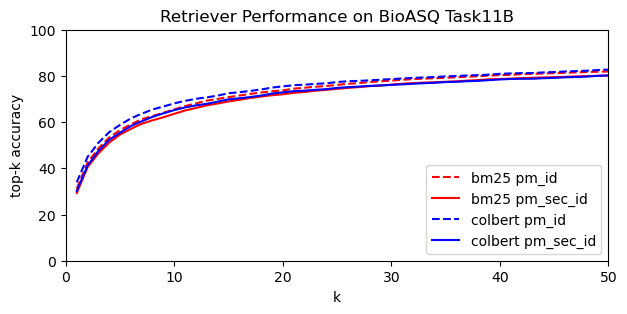

saving figure in /data/tir/projects/tir6/general/afreens/dbqa/figs/complete_bioasq_retriever_results_by_k.pdf


In [39]:
# wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
dataset = 'bioasq'
is_bioasq = True if 'bioasq' in dataset else False
ks = np.arange(1,101)
plt.figure(figsize = (7,3))
retrievers = ['bm25', 'colbert']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
if is_bioasq:
    docid_key = 'pmid'
    docid_name = 'pm'
    section_key = 'section'
    section_name = 'sec'
else:
    docid_key = 'wikipedia_id'
    docid_name = 'wiki'
    section_name = 'par'
    section_key = 'start_paragraph_id'

colors = ['red', 'blue']
datasets = ['complete_bioasq']
for dataset in datasets:
    for i, retriever in enumerate(retrievers):
        evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
        results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
        wiki_id_match = []
        wiki_par_id_match = []

        for k in ks:
            wiki_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_id accuracy'])
            wiki_par_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_{section_name}_id accuracy'])


        color = colors[i]
        print(f'{retriever}_doc_match = {wiki_par_id_match[:50]}')
        # plt.plot(ks, wiki_id_match, color = color, linestyle = '--', label = f'complete, {retriever} {docid_name}_id')
        # plt.plot(ks, wiki_par_id_match, color = color, label = f'complete, {retriever} {docid_name}_{section_name}_id')
        plt.plot(ks, 100*np.array(wiki_id_match), color = color, linestyle = '--', label = f'{retriever} {docid_name}_id')
        plt.plot(ks, 100*np.array(wiki_par_id_match), color = color, label = f'{retriever} {docid_name}_{section_name}_id')
        
        if retriever == 'colbert':
            colbert_wiki_par_id_match = wiki_par_id_match
        else:
            bm25_wiki_par_id_match = wiki_par_id_match
# plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
plt.title(f'Retriever Performance on BioASQ Task11B')
plt.ylabel('top-k accuracy')
plt.ylim(bottom = 0, top = 100)
plt.xlim(left =0, right = 50)
# plt.yticks(ticks = np.arange(0, 1.1, 0.2))
plt.xlabel('k')
plt.legend()
fig_file = os.path.join('/data/tir/projects/tir6/general/afreens/dbqa/figs/', dataset.split('-')[0]+ '_retriever_results_by_k.pdf')
plt.savefig(fig_file, bbox_inches='tight', pad_inches=0)
plt.show()
print('saving figure in', fig_file)

In [20]:
# loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
bm25_doc_match = [0.29319781078967944, 0.40552514985665883, 0.4649465728433672, 0.5118582225697159, 0.5462600990357049, 0.5710190252801668, 0.5931717487620537, 0.6080271045087308, 0.6213187385978629, 0.63617409434454, 0.6505082095387021, 0.6614542611415168, 0.672660933020589, 0.6807401615845713, 0.689601250977326, 0.6966379984362784, 0.7047172270002606, 0.7107114933541829, 0.7164451394318478, 0.7206150638519677, 0.7268699504821475, 0.7305186343497524, 0.7359916601511598, 0.7396403440187647, 0.744070888715142, 0.7482408131352619, 0.7516288767266094, 0.7557988011467293, 0.7586656241855616, 0.7620536877769091, 0.766223612197029, 0.7688298149596039, 0.7711753974459213, 0.7724784988272088, 0.7748240813135262, 0.7766484232473286, 0.7795152462861611, 0.7818608287724785, 0.7852488923638259, 0.7868126140213708, 0.7881157154026583, 0.7904612978889758, 0.7920250195465207, 0.7933281209278081, 0.7946312223090957, 0.7961949439666406, 0.7977586656241855, 0.7993223872817306, 0.8003648683867605, 0.8014073494917905]
# loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
colbert_doc_match = [0.3023195204586917, 0.4115194162105812, 0.4756320041699244, 0.5238467552775606, 0.5543393275996873, 0.5832681782642689, 0.6038571800886109, 0.6231430805316653, 0.6382590565545999, 0.6520719311962471, 0.6637998436278343, 0.672660933020589, 0.6794370602032838, 0.6888193901485535, 0.6987229606463383, 0.7034141256189732, 0.708626531144123, 0.7148814177743028, 0.7237425071670576, 0.7289549126922075, 0.7339066979410999, 0.7362522804274173, 0.7399009642950222, 0.7427677873338546, 0.7482408131352619, 0.7513682564503519, 0.7539744592129267, 0.7568412822517592, 0.7586656241855616, 0.7612718269481366, 0.763617409434454, 0.7659629919207714, 0.7685691946833464, 0.7703935366171488, 0.7735209799322388, 0.7745634610372687, 0.7771696637998436, 0.7787333854573886, 0.7818608287724785, 0.7847276518113109, 0.7868126140213708, 0.7875944748501433, 0.7878550951264008, 0.7899400573364608, 0.7915037789940057, 0.7938493614803231, 0.7954130831378681, 0.7969768047954131, 0.8003648683867605, 0.8024498305968204]


In [28]:
np.mean(np.array(colbert_doc_match)-np.array(bm25_doc_match))*100

0.3601772217878544

In [24]:
np.min(np.array(colbert_doc_match)-np.array(bm25_doc_match))

-0.004169924420119875

In [24]:
np.mean(np.array(colbert_wiki_par_id_match[:50])-np.array(bm25_wiki_par_id_match[:50]))

0.003601772217878544

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [5]:
# # wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
# dataset = 'bioasq'
# is_bioasq = True if 'bioasq' in dataset else False
# ks = np.arange(1,101)
# retrievers = ['bm25', 'colbert']
# colors = 'rb'
# if is_bioasq:
#     docid_key = 'pmid'
#     docid_name = 'pm'
#     section_key = 'section'
#     section_name = 'sec'
# else:
#     docid_key = 'wikipedia_id'
#     docid_name = 'wiki'
#     section_name = 'par'
#     section_key = 'start_paragraph_id'
# # ks = results_by_k.keys()
    
    
# results_by_key = {}
# retriever = 'bm25'
# datasets = ['bioasq', 'complete_bioasq']
# for i, dataset in enumerate(datasets):
# # for i, retriever in enumerate(retrievers):
#     evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
#     results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
#     wiki_id_match = []
#     wiki_par_id_match = []

#     for k in ks:
#         wiki_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_id accuracy'])
#         wiki_par_id_match.append(results_by_k[(str)(k)][f'top-k {docid_name}_{section_name}_id accuracy'])


#     color = colors[i]
#     plt.plot(ks, wiki_id_match, color = color, linestyle = '--', label = f'{dataset} wiki_id')
#     plt.plot(ks, wiki_par_id_match, color = color, label = f'{dataset} wiki_par_id')
#     # break
   

# # plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
# plt.title(f'retriever = {retriever}')
# plt.ylabel('top-k accuracy')
# plt.xlabel('k')
# plt.legend()
# plt.show()
# print('saving figure in', os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt_results_by_k.json


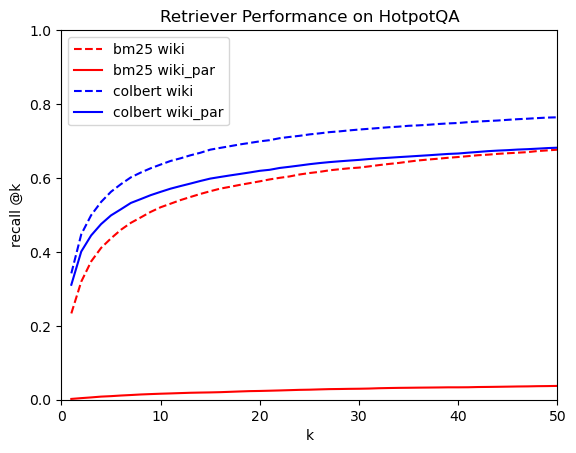

saving figure in /data/tir/projects/tir6/general/afreens/dbqa/figs/hotpotqa_retriever_results_by_k.pdf


In [27]:
# wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
dataset = 'hotpotqa-dev-kilt'
is_bioasq = True if 'bioasq' in dataset else False
ks = np.arange(1,101)
retrievers = ['bm25', 'colbert']
colors = 'rb'
if is_bioasq:
    docid_key = 'pmid'
    docid_name = 'pm'
    section_key = 'section'
    section_name = 'sec'
else:
    docid_key = 'wikipedia_id'
    docid_name = 'wiki'
    section_name = 'par'
    section_key = 'start_paragraph_id'
# ks = results_by_k.keys()

    
for i, retriever in enumerate(retrievers):
    evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
    results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
    wiki_id_match = []
    wiki_par_id_match = []

    for k in ks:
        wiki_id_match.append(results_by_k[(str)(k)][f"recall@k {docid_name}_id"])
        wiki_par_id_match.append(results_by_k[(str)(k)][f"recall@k {docid_name}_{section_name}_id"])


    color = colors[i]
    if retriever == 'colbert':
        colbert_wiki_par_id_match = wiki_par_id_match
    else:
        bm25_wiki_par_id_match = wiki_par_id_match
    plt.plot(ks, wiki_id_match, color = color, linestyle = '--', label = f'{retriever} {docid_name}')
    plt.plot(ks, wiki_par_id_match, color = color, label = f'{retriever} {docid_name}_{section_name}')
    # break

# plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
plt.title(f'Retriever Performance on HotpotQA')
plt.ylim(bottom = 0, top = 1.0)
plt.yticks(ticks = np.arange(0, 1.1, 0.2))
plt.ylabel('recall @k')
plt.xlabel('k')
plt.legend()
plt.xlim(left =0, right = 50)
# plt.savefig(os.path.join('/home/jhsia2/ragged/retriever', dataset+ '_results_by_k.jpg'))
fig_file = os.path.join('/data/tir/projects/tir6/general/afreens/dbqa/figs/', dataset.split('-')[0]+ '_retriever_results_by_k.pdf')
plt.savefig(fig_file, bbox_inches='tight', pad_inches=0)
plt.show()
print('saving figure in', fig_file)


loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt_results_by_k.json


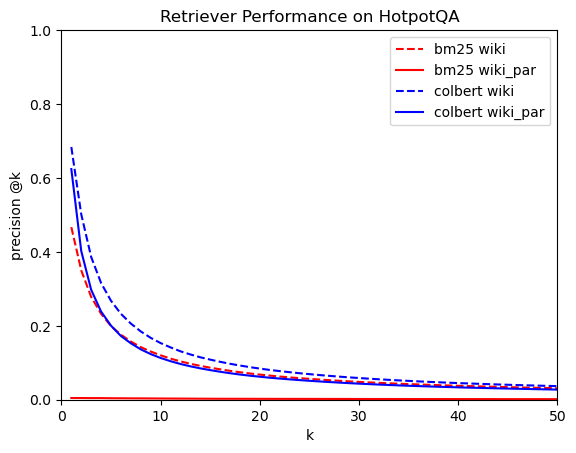

saving figure in /data/tir/projects/tir6/general/afreens/dbqa/figs/hotpotqa_retriever_results_by_k.pdf


In [30]:
# wiki_id_match, wiki_par_id_match = results_by_key(ks, results_by_k, is_bioasq = is_bioasq)
dataset = 'hotpotqa-dev-kilt'
is_bioasq = True if 'bioasq' in dataset else False
ks = np.arange(1,101)
retrievers = ['bm25', 'colbert']
colors = 'rb'
if is_bioasq:
    docid_key = 'pmid'
    docid_name = 'pm'
    section_key = 'section'
    section_name = 'sec'
else:
    docid_key = 'wikipedia_id'
    docid_name = 'wiki'
    section_name = 'par'
    section_key = 'start_paragraph_id'
# ks = results_by_k.keys()

    
for i, retriever in enumerate(retrievers):
    evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', retriever)
    results_by_k = load_json(os.path.join(evaluation_dir, dataset+ '_results_by_k.json'))
    wiki_id_match = []
    wiki_par_id_match = []

    for k in ks:
        wiki_id_match.append(results_by_k[(str)(k)][f"precision@k {docid_name}_id"])
        wiki_par_id_match.append(results_by_k[(str)(k)][f"precision@k {docid_name}_{section_name}_id"])


    color = colors[i]
    if retriever == 'colbert':
        colbert_wiki_par_id_match = wiki_par_id_match
    else:
        bm25_wiki_par_id_match = wiki_par_id_match
    plt.plot(ks, wiki_id_match, color = color, linestyle = '--', label = f'{retriever} {docid_name}')
    plt.plot(ks, wiki_par_id_match, color = color, label = f'{retriever} {docid_name}_{section_name}')
    # break

# plt.savefig(os.path.join(evaluation_dir, dataset+ '_results_by_k.jpg'))
plt.title(f'Retriever Performance on HotpotQA')
plt.ylim(bottom = 0, top = 1.0)
plt.yticks(ticks = np.arange(0, 1.1, 0.2))
plt.ylabel('precision @k')
plt.xlabel('k')
plt.legend()
plt.xlim(left =0, right = 50)
# plt.savefig(os.path.join('/home/jhsia2/ragged/retriever', dataset+ '_results_by_k.jpg'))
fig_file = os.path.join('/data/tir/projects/tir6/general/afreens/dbqa/figs/', dataset.split('-')[0]+ '_retriever_results_by_k.pdf')
# plt.savefig(fig_file, bbox_inches='tight', pad_inches=0)
plt.show()
print('saving figure in', fig_file)


In [28]:
np.mean(np.array(colbert_wiki_par_id_match[:50])-np.array(bm25_wiki_par_id_match[:50]))

0.5855660714285714

In [41]:
def get_precision(guess_wiki_id_set, gold_wiki_id_set):
    precision = np.mean([[s in gold_wiki_id_set] for s in guess_wiki_id_set])
    return precision

def get_recall(guess_wiki_id_set, gold_wiki_id_set):
    # print(guess_wiki_id_set)
    # print(gold_wiki_id_set)
    recall = np.mean([[s in guess_wiki_id_set] for s in gold_wiki_id_set]) if len(gold_wiki_id_set) > 0 else 0.0
    return recall

In [102]:
def complete_stats(retriever_results, gold_data, ks, is_bioasq = False):

    if is_bioasq:
        docid_key = 'pmid'
        docid_name = 'pm'
        section_key = 'section'
        section_name = 'sec'
    else:
        docid_key = 'wikipedia_id'
        docid_name = 'wiki'
        section_key = 'start_paragraph_id'
        section_name = 'par'

    
    wiki_id_per_r = []
    wiki_par_id_per_r = []
# par_retriever_results[0]['output']['retrieved']
    for r in retriever_results:
        wiki_ids = []
        wiki_par_ids = []
        # r['output']['retriever_evaluation'] = {}
        
        for d in r['output']['retrieved']:
            wiki_ids.append(d[f'{docid_name}_id'])
            wiki_par_ids.append(d[f'{docid_name}_{section_name}_id'])

        wiki_id_per_r.append(wiki_ids)
        wiki_par_id_per_r.append(wiki_par_ids)

    
    # results_by_k = {}
    # for k in ks:
        # print(k)
        # results_by_k[(int)(k)] = {
        #     f'top-k {docid_name}_id accuracy': [],\
        #     f'top-k {docid_name}_{section_name}_id accuracy':[],\
        #     f"precision@k {docid_name}_id":[],\
        #     f"precision@k {docid_name}_{section_name}_id":[],\
        #     f"recall@k {docid_name}_id": [],\
        #     f"recall@k {docid_name}_{section_name}_id": []
        # }
    for r in range(len(retriever_results)):
        gold_wiki_id_set = gold_data[r]['output'][f'{docid_name}_id_set']
        gold_wiki_par_id_set = gold_data[r]['output'][f'{docid_name}_{section_name}_id_set']
        guess_wiki_id_set = set(wiki_id_per_r[r])
        guess_wiki_par_id_set = set(wiki_par_id_per_r[r])
        retriever_results[r]['output']['retriever_evaluation'] = {}
        # print(retriever_results[r]['output']['retriever_evaluation'])
        retriever_results[r]['output']['retriever_evaluation'][f'top-k {docid_name}_id match'] = any([(w in gold_wiki_id_set) for w in guess_wiki_id_set])
        retriever_results[r]['output']['retriever_evaluation'][f'top-k {docid_name}_{section_name}_id match'] = any([(w in gold_wiki_par_id_set) for w in guess_wiki_par_id_set])
        retriever_results[r]['output']['retriever_evaluation'][f"precision@k {docid_name}_id"] = get_precision(guess_wiki_id_set, gold_wiki_id_set)
        retriever_results[r]['output']['retriever_evaluation'][f"precision@k {docid_name}_{section_name}_id"] = get_precision(guess_wiki_par_id_set, gold_wiki_par_id_set)
        retriever_results[r]['output']['retriever_evaluation'][f"recall@k {docid_name}_id"] = get_recall(guess_wiki_id_set, gold_wiki_id_set)
        retriever_results[r]['output']['retriever_evaluation'][f"recall@k {docid_name}_{section_name}_id"] = get_recall(guess_wiki_par_id_set, gold_wiki_par_id_set)

        # for key,val in results_by_k[(int)(k)].items():
        #     results_by_k[(int)(k)][key] = val/len(retriever_results)
    return retriever_results

In [103]:
dataset = 'nq'
model = 'bm25'
# evaluation_dir = os.path.join(result_dir, 'retriever_results/evaluations', model)

if 'bioasq' in dataset:
    docid_key = 'pmid'
    docid_name = 'pm'
    section_key = 'section'
    section_name = 'sec'
else:
    docid_key = 'wikipedia_id'
    docid_name = 'wiki'
    section_name = 'par'
    section_key = 'start_paragraph_id'
    
if 'bioasq' in dataset:
    gold_data = load_json(os.path.join(result_dir, 'data', f"gold_bioasq_zeno_file.json"), sort_by_id = True)
else:
    gold_data = load_json(os.path.join(result_dir, 'data', f"gold_{dataset.split('-')[0]}_zeno_file.json"), sort_by_id = True)
# ks = np.arange(1,101)
ks = [1,2,3, 5, 10, 20, 30, 50]
k = ks[0]
par_retriever_results = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_70b/{dataset}/{retriever}/top{k}/reader_results_zeno.json', sort_by_id = True)

# ks = [50]
par_retriever_results =  complete_stats(par_retriever_results, gold_data, [1], is_bioasq = 'bioasq' in dataset)

reading from /data/user_data/jhsia2/dbqa/data/gold_nq_zeno_file.json
reading from /data/user_data/jhsia2/dbqa/reader_results/llama_70b/nq/bm25/top1/reader_results_zeno.json


1.0

In [ ]:
par_retriever_results[0]

In [53]:
# ['top-k wiki_id accuracy', 'top-k wiki_par_id accuracy', 'precision@k wiki_id', 'precision@k wiki_par_id', 'recall@k wiki_id', 'recall@k wiki_par_id']

(array([  13,   32,   40,   64,   66,   76,   80,  106,  122,  127,  128,
         156,  205,  283,  287,  316,  321,  356,  374,  376,  408,  410,
         439,  461,  467,  474,  510,  520,  537,  560,  565,  580,  587,
         594,  596,  600,  609,  653,  661,  668,  679,  691,  695,  700,
         710,  724,  736,  749,  761,  769,  777,  788,  792,  801,  807,
         921,  926,  935,  943,  954,  965,  969,  970,  982,  986,  991,
         995, 1003, 1005, 1020, 1021, 1046, 1085, 1110, 1125, 1158, 1161,
        1167, 1208, 1256, 1267, 1298, 1302, 1303, 1325, 1331, 1378, 1392,
        1393, 1414, 1438, 1441, 1495, 1503, 1513, 1536, 1545, 1551, 1593,
        1601, 1612, 1623, 1655, 1668, 1673, 1680, 1686, 1691, 1700, 1704,
        1730, 1743, 1760, 1788, 1800, 1811, 1814, 1823, 1834, 1837, 1844,
        1937, 1943, 1950, 2027, 2032, 2034, 2036, 2045, 2075, 2155, 2161,
        2187, 2190, 2211, 2277, 2305, 2310, 2321, 2371, 2391, 2392, 2402,
        2403, 2423, 2428, 2434, 2472, 

In [112]:
np.mean(np.array([r['output']['answer_evaluation']['f1'] for r in par_retriever_results])[np.where([r['output']['retriever_evaluation']['top-k wiki_par_id match'] for r in par_retriever_results])[0]])

0.6638501518592017